In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [35]:
data = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/I8 HOx.csv')

In [36]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [37]:
data['ln_HOP'] = np.log(data['HOx'])

In [38]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

In [69]:
mod = LinearRegression()
y = data['ln_HOP']
X = data_sens[['SnSv_adj']]
mod.fit(X,y)
y_pred = mod.predict(X)
data['ln_HOP_adj'] = data['ln_HOP']*0.22 + y_pred*0.78

In [70]:
data

,region,beta,beta_ste,o3_ppb,HOx,HOx_ste,ln_HOP,ln_HOP_adj
0,AUS,8.514530,0.504224,21.908209,0.388646,0.023015,-0.945087,-1.198962
1,BRA,47.563649,1.550559,21.903138,2.171545,0.070792,0.775439,-0.490067
2,BTH,0.258473,0.011399,21.578030,0.011979,0.000528,-4.424641,-3.487387
3,CA,2.129049,0.124942,32.774687,0.064960,0.003812,-2.733981,-2.252423
4,CCE,1.972342,0.111034,33.468971,0.058930,0.003318,-2.831397,-1.760197
5,COD,27.340055,2.023979,29.898853,0.914418,0.067694,-0.089467,-0.283060
6,DEU,2.514762,0.071490,24.981628,0.100664,0.002862,-2.295963,-2.386762
7,FIN,14.640855,0.710823,22.499470,0.650720,0.031593,-0.429676,-1.528276
8,FRA,5.472910,0.114697,29.816768,0.183551,0.003847,-1.695261,-1.684221
9,GBA,1.556664,0.112885,32.034829,0.048593,0.003524,-3.024278,-2.112067


In [71]:
mod = LinearRegression()
X = data[['ln_HOP_adj']]
y = data_sens['SnSv_adj']
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[1.42927373]
2.8913053928598424
0.9083591890938408
0.3143513557949562


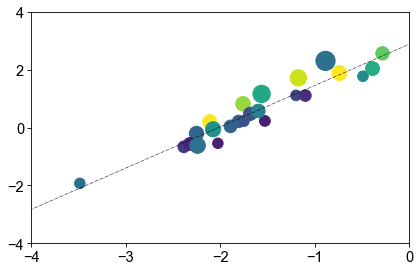

In [82]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = data[['ln_HOP_adj']]
y = data_sens['SnSv_adj']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-5,1,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-4,0])
plt.ylim([-4,4])
plt.yticks([-4,-2,0,2,4], fontsize=14)
plt.xticks([-4,-3,-2,-1,0], fontsize=14)

plt.savefig("Fig. 3j HOP-SnSv.pdf", format="pdf", bbox_inches="tight")

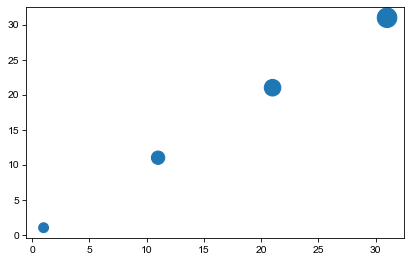

In [83]:
## Marker 大小标定
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
x = [1,11,21,31]
y = [1,11,21,31]
plt.scatter(x, y, s=[20**1.5,30**1.5,40**1.5,50**1.5])

plt.savefig("Fig. 3c-j marker size.pdf", format="pdf", bbox_inches="tight")